Q1. Write a unique paragraph (5-6 sentences) about your favorite topic (e.g., sports,
technology, food, books, etc.).
1. Convert text to lowercase and remove punctuaƟon using re.
2. Tokenize the text into words and sentences.
3. Split using split() and word_tokenize() and compare how Python split and NLTK’s
word_tokenize() differ.
4. Remove stopwords (using NLTK's stopwords list).
5. Display word frequency distribution (excluding stopwords).


In [4]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.probability import FreqDist

paragraph = """
Association football, more commnly known as footbll or soccer, is a team sport played between two teams of 11 players who almost exclusively use their feet to propel a ball around a rectangular field called a pitch. The objective of the game is to score more goals than the opposing team by moving the ball beyond the goal line into a rectangular-framed goal defended by the opposing team. Traditionally, the game has been played over two 45-minute halves, for a total match time of 90 minutes. With an estimated 250 million players active in over 200 countries and territories, it is the world's most popular sport.
"""

text = paragraph.lower()
text_no_punct = re.sub(r'[^\w\s]', '', text)

words_split = text_no_punct.split()
words_tokenize = word_tokenize(text_no_punct)
sentences = sent_tokenize(text)

print("Split():", words_split[:10])
print("word_tokenize():", words_tokenize[:10])

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in words_tokenize if word not in stop_words]

fdist = FreqDist(filtered_words)
print("Top 10 frequent words (no stopwords):")
print(fdist.most_common(10))


Split(): ['association', 'football', 'more', 'commnly', 'known', 'as', 'footbll', 'or', 'soccer', 'is']
word_tokenize(): ['association', 'football', 'more', 'commnly', 'known', 'as', 'footbll', 'or', 'soccer', 'is']
Top 10 frequent words (no stopwords):
[('team', 3), ('sport', 2), ('played', 2), ('two', 2), ('players', 2), ('ball', 2), ('game', 2), ('opposing', 2), ('goal', 2), ('association', 1)]


Q2. Using the same paragraph from Q1:
1. Extract all words with only alphabets using re.findall()
2. Remove stop words using NLTK’s stopword list
3. Perform stemming with PorterStemmer
4. Perform lemmatization with WordNetLemmaƟzer
5. Compare the stemmed and lemmatized outputs and explain when you’d prefer one over
the other.


In [7]:

from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.corpus import stopwords, wordnet

text = paragraph.lower()
text_no_punct = re.sub(r'[^\w\s]', '', text)

alpha_words = re.findall(r'\b[a-zA-Z]+\b', text_no_punct)

stop_words = set(stopwords.words('english'))
filtered_words = [word for word in alpha_words if word not in stop_words]

porter = PorterStemmer()
stemmed_words = [porter.stem(word) for word in filtered_words]

lemmatizer = WordNetLemmatizer()
lemmatized_words = [lemmatizer.lemmatize(word) for word in filtered_words]

print("Original Filtered Words:\n", filtered_words[:15])
print("\nStemmed Words:\n", stemmed_words[:15])
print("\nLemmatized Words:\n", lemmatized_words[:15])


Original Filtered Words:
 ['association', 'football', 'commnly', 'known', 'footbll', 'soccer', 'team', 'sport', 'played', 'two', 'teams', 'players', 'almost', 'exclusively', 'use']

Stemmed Words:
 ['associ', 'footbal', 'commnli', 'known', 'footbll', 'soccer', 'team', 'sport', 'play', 'two', 'team', 'player', 'almost', 'exclus', 'use']

Lemmatized Words:
 ['association', 'football', 'commnly', 'known', 'footbll', 'soccer', 'team', 'sport', 'played', 'two', 'team', 'player', 'almost', 'exclusively', 'use']


Q3. Choose 3 short texts of your own (e.g., different news headlines, product reviews).
1. Use CountVectorizer to generate the Bag of Words representaƟon.
2. Use TfidfVectorizer to compute TF-IDF scores.
3. Print and interpret the top 3 keywords from each text using TF-IDF.


In [8]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np
import pandas as pd
texts = [
    "The camera quality of this phone is outstanding.",
    "Battery life is poor and drains quickly.",
    "Affordable price but the build quality is average."
]

count_vectorizer = CountVectorizer()
bow_matrix = count_vectorizer.fit_transform(texts)
print("\nBag of Words:\n", pd.DataFrame(bow_matrix.toarray(), columns=count_vectorizer.get_feature_names_out()))

tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(texts)
feature_names = tfidf_vectorizer.get_feature_names_out()

print("\nTop 3 Keywords from each text (TF-IDF):")
for i in range(len(texts)):
    row = tfidf_matrix[i].toarray().flatten()
    top_indices = row.argsort()[-3:][::-1]
    keywords = [feature_names[idx] for idx in top_indices]
    print(f"Text {i+1}: {keywords}")



Bag of Words:
    affordable  and  average  battery  build  but  camera  drains  is  life  \
0           0    0        0        0      0    0       1       0   1     0   
1           0    1        0        1      0    0       0       1   1     1   
2           1    0        1        0      1    1       0       0   1     0   

   of  outstanding  phone  poor  price  quality  quickly  the  this  
0   1            1      1     0      0        1        0    1     1  
1   0            0      0     1      0        0        1    0     0  
2   0            0      0     0      1        1        0    1     0  

Top 3 Keywords from each text (TF-IDF):
Text 1: ['this', 'outstanding', 'phone']
Text 2: ['quickly', 'life', 'poor']
Text 3: ['but', 'affordable', 'price']


Q4. Write 2 short texts (4–6 lines each) describing two different technologies (e.g., AI vs
Blockchain).
1. Preprocess and tokenize both texts.
2. Calculate:
a. Jaccard Similarity using sets
b. Cosine Similarity using TfidfVectorizer + cosine_similarity()
c. Analyze which similarity metric gives better insights in your case.


In [10]:
from sklearn.metrics.pairwise import cosine_similarity
text1 = """Artificial Intelligence (AI) is transforming industries through automation and data-driven decision making.
AI systems can recognize patterns, make predictions, and continuously improve through machine learning.
It is widely used in healthcare, finance, and customer service."""

text2 = """Blockchain is a decentralized technology for securely recording transactions.
It uses cryptographic hashing and distributed ledgers to ensure data integrity.
Blockchain is commonly used in cryptocurrencies and supply chain management."""
def preprocess(text):
    text = text.lower()
    text = re.sub(r'[^\w\s]', '', text)
    tokens = text.split()
    tokens = [word for word in tokens if word not in stopwords.words('english')]
    return set(tokens)

tokens1 = preprocess(text1)
tokens2 = preprocess(text2)

jaccard_sim = len(tokens1 & tokens2) / len(tokens1 | tokens2)
print(f"Jaccard Similarity: {jaccard_sim:.3f}")

tfidf = TfidfVectorizer()
tfidf_matrix = tfidf.fit_transform([text1, text2])
cosine_sim = cosine_similarity(tfidf_matrix[0:1], tfidf_matrix[1:2])[0][0]
print(f"Cosine Similarity: {cosine_sim:.3f}")

Jaccard Similarity: 0.023
Cosine Similarity: 0.209


Q5. Write a short review for a product or service.
1. Use TextBlob or VADER to find polarity & subjectivity for each review.
2. Classify reviews into Positive / Negative / Neutral.
3. Create a word cloud using the wordcloud library for all positive reviews.

Review: The product quality is excellent and delivery was super fast.
Polarity: 0.51, Subjectivity: 0.76, Sentiment: Positive

Review: Not satisfied. The item was damaged and customer support was unhelpful.
Polarity: -0.25, Subjectivity: 1.00, Sentiment: Negative

Review: Average experience. The packaging was okay but delivery was delayed.
Polarity: 0.17, Subjectivity: 0.45, Sentiment: Positive

Review: Absolutely loved it! Great value for money.
Polarity: 0.84, Subjectivity: 0.78, Sentiment: Positive

Review: Terrible service. Would not recommend to anyone.
Polarity: -1.00, Subjectivity: 1.00, Sentiment: Negative



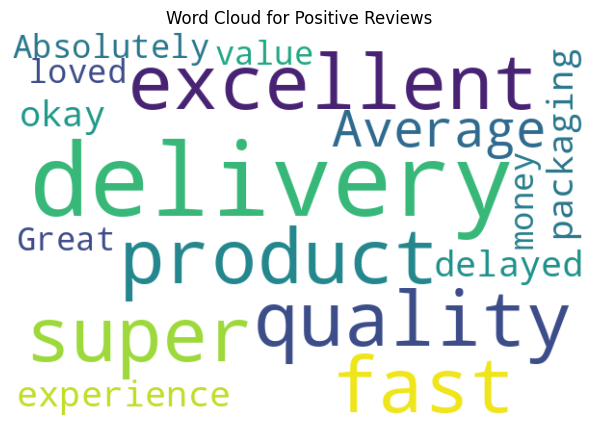

In [13]:
reviews = [
    "The product quality is excellent and delivery was super fast.",
    "Not satisfied. The item was damaged and customer support was unhelpful.",
    "Average experience. The packaging was okay but delivery was delayed.",
    "Absolutely loved it! Great value for money.",
    "Terrible service. Would not recommend to anyone."
]
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def classify_review(review):
    analysis = TextBlob(review)
    polarity = analysis.polarity
    if polarity > 0:
        sentiment = "Positive"
    elif polarity < 0:
        sentiment = "Negative"
    else:
        sentiment = "Neutral"
    return polarity, analysis.subjectivity, sentiment

results = []
positive_text = ""
for review in reviews:
    polarity, subjectivity, sentiment = classify_review(review)
    results.append((review, polarity, subjectivity, sentiment))
    if sentiment == "Positive":
        positive_text += " " + review

for r in results:
    print(f"Review: {r[0]}\nPolarity: {r[1]:.2f}, Subjectivity: {r[2]:.2f}, Sentiment: {r[3]}\n")

wordcloud = WordCloud(width=600, height=400, background_color='white').generate(positive_text)
plt.figure(figsize=(8, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud for Positive Reviews")
plt.show()



Q6. Choose your own paragraph (~100 words) as training data.
1. Tokenize text using Tokenizer() from keras.preprocessing.text
2. Create input sequences and build a simple LSTM or Dense model
3. Train the model and generate 2–3 new lines of text starting from any seed word you
provide.

In [17]:
text = """Anime is such a unique and vibrant medium — it brings together amazing storytelling and eye-catching visuals in a way that's hard to match. Whether you're into high-energy adventures like Demon Slayer or prefer the calm, cozy vibes of something like Yuru Camp, there's genuinely something for everyone. What makes anime really special is how it can tap into deep emotions and tell stories that go beyond language and borders. Newer shows keep raising the bar, pushing what animation can do and how stories are told. At the end of the day, anime isn't just about entertainment — it's a form of art and culture that connects with people all over the world."""
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
# 1. Tokenize text
tokenizer = Tokenizer()
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

# Create input sequences
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(2, len(token_list)+1):
        n_gram_sequence = token_list[:i]
        input_sequences.append(n_gram_sequence)

# Pad sequences
max_seq_len = max([len(seq) for seq in input_sequences])
input_sequences = pad_sequences(input_sequences, maxlen=max_seq_len, padding='pre')

# Split predictors and label
xs, labels = input_sequences[:,:-1], input_sequences[:,-1]
ys = np.zeros((len(labels), total_words))
for i, label in enumerate(labels):
    ys[i, label] = 1

# 2. Build a simple LSTM model
model = Sequential()
model.add(Embedding(total_words, 10, input_length=max_seq_len-1))
model.add(LSTM(50))
model.add(Dense(total_words, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# 3. Train the model
model.fit(xs, ys, epochs=200, verbose=0)

# Generate new text
seed_text = "anime"
next_words = 15
for _ in range(next_words):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]
    for word, index in tokenizer.word_index.items():
        if index == predicted:
            seed_text += " " + word
            break

print("Generated text:")
print(seed_text)

Generated text:
anime such such such a and vibrant vibrant medium — brings brings amazing amazing storytelling eye
